# 교내 신설 도서관에는 어떤 문제가 있을지 많이 나오는 단어를 찾아보자


In [1]:
import pandas as pd
import numpy as np
import datetime as dt

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# matplotlib 한글 깨짐 해결
plt.rcParams['font.family'] = 'AppleGothic' # For MacOS
plt.rcParams['axes.unicode_minus'] =False

# Seaborn 폰트 설정
sns.set(font='AppleGothic') # 사용하고 있는 한글 폰트로 변경

print(plt.rcParams['font.family'])

['AppleGothic']


In [2]:
df = pd.read_csv('../data/everytime_crawling_all.csv')
df

,날짜,좋아요,내용
0,36분 전,12,덕설이 ㄹㅇ 앙큼하고 사람같은 점:아까 논술고사 끝나구 학생들 나오기 시작하니까 갑...
1,49분 전,0,학교 20분 거리면 닥 도서관 가서 공부?아님 안 씻고 집에서 공부?
2,2022-11-27 9:53,0,도서관 왔는데 오자마자 집 가고싶어지는거 어쩔... 왤케 힘이 없지
3,2022-11-26 17:00,109,학교 왔다 현수막 봤는데 개길어ㅋㅋㅋ태어나서 본 현수막중 제일 장대한 길이를 자랑함...
4,2022-11-26 15:56,5,종로캠 들어가는거 이제 도서관 모바일 학생증으로 통일하기로 했대 가 볼 사람 참고해...
...,...,...,...
2393,2017-08-18 14:26,0,동덕다니는 애한테 학벌로 까이면 뭐라고 답해야 함?
2394,2017-05-02 12:40,1,"우리 고홍즈 하자,,, 나 동덕다니냐는 소리 지겨워ㅜㅜㅜ"
2395,2017-03-01 1:57,0,어이가없어서 잠도안와서 글쓰는데 ㅋㅋㅋㅋ내친구 동덕다니는데 오늘 연대애들이랑 3대 ...
2396,2017-01-29 19:55,2,아니 지가 15만원정도 되는 덕다운 추천해달래서누가 15만원으로 덕다운 살수 있는게...


In [3]:
content_all = ''
for i in range(len(df['내용'])):
    content_all = content_all + ' ' + df['내용'].loc[i]
content_all

' 덕설이 ㄹㅇ 앙큼하고 사람같은 점:아까 논술고사 끝나구 학생들 나오기 시작하니까 갑자기 튀어니와서 도서관 앞 언덕에 자리잡고 누움심지어 꼬리도 살랑살랑 흔들면서 시선유도함 학교 20분 거리면 닥 도서관 가서 공부?아님 안 씻고 집에서 공부? 도서관 왔는데 오자마자 집 가고싶어지는거 어쩔... 왤케 힘이 없지 학교 왔다 현수막 봤는데 개길어ㅋㅋㅋ태어나서 본 현수막중 제일 장대한 길이를 자랑함도서관쪽 시위현수막은 안 가려져 있어서 아쉬운데 그래도 이 정도만 해도 훨씬 보기 좋은듯진짜 어어어아어엄청 길어서 한 화면에 다 안 집힐정도ㅋㅋㅋㅋ 종로캠 들어가는거 이제 도서관 모바일 학생증으로 통일하기로 했대 가 볼 사람 참고해~총학에서 붙여둔 이사회 규탄글은 몇번이나 찢어진 듯해 덕우들 도서관에서 빌린 책 28일에 반납 예정인데 기간 연장할 수 있어? 나 너무 그냥 공부 때문에 스트레스 받아그렇다고 공부 잘하는 것도 아니고그냥 공부 잘하고 싶어서 의자에는 시험 기간 아니어도 일주일에 2-3일은 5시간동안 앉아서 공부하려고 하는거 같아근데 이제 시험 2주도 안 남았는데 아무것도 머리에 없고 그래..내 공부방법이 뭔지 모르겠어 진짜 공부 너무 잘하고 싶고 점수도 잘 받고 싶고 다른 사람들 놀 때 공부하려고 도서관도 자주 가고 그랬는데머리가 텅텅 비어서 눈물이 나지금 해봤자 나는 그냥 망할거 같고 시간도 없어서 뭐 할 수도 없어1회독 했는데 머리 GTQ 시험보는 덕우들 차관 열린 문이 도서관방향 문들 말고 대강의동쪽에 있는 뒷문같은 곳 맞지? 우리 내일 덕성다움 안 하고 이런건 아니지? 도서관이랑 학사공지에 별말없으니 논술고사라도 갈 수 있는거겠지 괜히 허탕칠까봐.. 도서관이나 놀이공원, 식당이나 마트 문 닫기 몇 분 전에 노래 틀어주는거 얼른 여기서 썩 꺼지라는걸로 https://apply.kf.or.kr/selectNoticeAndApplicationView.nkf?notiSeq=&anucNo=A1P0000871&pageIndex=1 도서관 관내대출가능이면 도서관 안에

In [4]:
# 영어 지우고 이상한 문자 지우기
import re
content_all = re.sub('[^ㄱ-ㅣ가-힣 ]', "", content_all)
content_all = str(content_all)
content_all

' 덕설이 ㄹㅇ 앙큼하고 사람같은 점아까 논술고사 끝나구 학생들 나오기 시작하니까 갑자기 튀어니와서 도서관 앞 언덕에 자리잡고 누움심지어 꼬리도 살랑살랑 흔들면서 시선유도함 학교 분 거리면 닥 도서관 가서 공부아님 안 씻고 집에서 공부 도서관 왔는데 오자마자 집 가고싶어지는거 어쩔 왤케 힘이 없지 학교 왔다 현수막 봤는데 개길어ㅋㅋㅋ태어나서 본 현수막중 제일 장대한 길이를 자랑함도서관쪽 시위현수막은 안 가려져 있어서 아쉬운데 그래도 이 정도만 해도 훨씬 보기 좋은듯진짜 어어어아어엄청 길어서 한 화면에 다 안 집힐정도ㅋㅋㅋㅋ 종로캠 들어가는거 이제 도서관 모바일 학생증으로 통일하기로 했대 가 볼 사람 참고해총학에서 붙여둔 이사회 규탄글은 몇번이나 찢어진 듯해 덕우들 도서관에서 빌린 책 일에 반납 예정인데 기간 연장할 수 있어 나 너무 그냥 공부 때문에 스트레스 받아그렇다고 공부 잘하는 것도 아니고그냥 공부 잘하고 싶어서 의자에는 시험 기간 아니어도 일주일에 일은 시간동안 앉아서 공부하려고 하는거 같아근데 이제 시험 주도 안 남았는데 아무것도 머리에 없고 그래내 공부방법이 뭔지 모르겠어 진짜 공부 너무 잘하고 싶고 점수도 잘 받고 싶고 다른 사람들 놀 때 공부하려고 도서관도 자주 가고 그랬는데머리가 텅텅 비어서 눈물이 나지금 해봤자 나는 그냥 망할거 같고 시간도 없어서 뭐 할 수도 없어회독 했는데 머리  시험보는 덕우들 차관 열린 문이 도서관방향 문들 말고 대강의동쪽에 있는 뒷문같은 곳 맞지 우리 내일 덕성다움 안 하고 이런건 아니지 도서관이랑 학사공지에 별말없으니 논술고사라도 갈 수 있는거겠지 괜히 허탕칠까봐 도서관이나 놀이공원 식당이나 마트 문 닫기 몇 분 전에 노래 틀어주는거 얼른 여기서 썩 꺼지라는걸로  도서관 관내대출가능이면 도서관 안에서만 읽을 수 있다는거임 도서관중에 스피킹 연습할 중얼중얼 가능 공간 없겠지 도서관 플랭크 레이저컷팅 사용해보신 분 있나요 어떤 파일 가져가야 하는지 궁금합니다 덕새 공책덕성 원고지스티커덕새 그립톡법학과 굿즈덕성 전차스사학

In [5]:
# ! pip install konlpy

In [6]:
# Okt 클래스로 게시글에서 명사만 추출
from konlpy.tag import Okt
okt = Okt()
nouns_txt = okt.nouns(content_all)
nouns_txt

['덕설',
 '사람',
 '점',
 '논술',
 '고사',
 '학생',
 '시작',
 '갑자기',
 '튀어',
 '도서관',
 '앞',
 '언덕',
 '자리',
 '잡고',
 '누움',
 '심지어',
 '꼬리',
 '선유도',
 '함',
 '학교',
 '분',
 '거리',
 '닥',
 '도서관',
 '부아',
 '안',
 '집',
 '공부',
 '도서관',
 '자마자',
 '집',
 '왤케',
 '힘',
 '학교',
 '현수막',
 '현수막',
 '제일',
 '장대',
 '길이',
 '자랑',
 '함',
 '도서관',
 '쪽',
 '시위',
 '현수막',
 '안',
 '이',
 '정도',
 '해도',
 '보기',
 '듯',
 '진짜',
 '어어',
 '어',
 '화면',
 '안',
 '집힐',
 '정도',
 '종로',
 '캠',
 '이제',
 '도서관',
 '모바일',
 '학생증',
 '통일',
 '볼',
 '사람',
 '참고',
 '학',
 '이사회',
 '규탄',
 '글',
 '몇번',
 '듯',
 '덕우',
 '도서관',
 '책',
 '일',
 '반납',
 '예정',
 '기간',
 '연장',
 '수',
 '나',
 '그냥',
 '공부',
 '때문',
 '스트레스',
 '공부',
 '것',
 '그냥',
 '공부',
 '의자',
 '시험',
 '기간',
 '일주일',
 '일',
 '시간',
 '동안',
 '공부',
 '이제',
 '시험',
 '주도',
 '안',
 '것',
 '머리',
 '공부',
 '방법',
 '진짜',
 '공부',
 '점수',
 '다른',
 '사람',
 '놀',
 '때',
 '공부',
 '도서관',
 '자주',
 '머리',
 '텅텅',
 '비어',
 '눈물',
 '나',
 '지금',
 '나',
 '그냥',
 '시간',
 '뭐',
 '수도',
 '회독',
 '머리',
 '시험',
 '덕우',
 '차관',
 '문',
 '도서관',
 '방향',
 '문',
 '대강',
 '동쪽',
 '뒷문',
 '곳',
 '우리',
 '내일',
 '덕',
 '

In [7]:
result = []
for temp in nouns_txt:
    if len(temp) > 1: # 두 글자 이상 명사만 가져온다
        result.append(temp)
result

['덕설',
 '사람',
 '논술',
 '고사',
 '학생',
 '시작',
 '갑자기',
 '튀어',
 '도서관',
 '언덕',
 '자리',
 '잡고',
 '누움',
 '심지어',
 '꼬리',
 '선유도',
 '학교',
 '거리',
 '도서관',
 '부아',
 '공부',
 '도서관',
 '자마자',
 '왤케',
 '학교',
 '현수막',
 '현수막',
 '제일',
 '장대',
 '길이',
 '자랑',
 '도서관',
 '시위',
 '현수막',
 '정도',
 '해도',
 '보기',
 '진짜',
 '어어',
 '화면',
 '집힐',
 '정도',
 '종로',
 '이제',
 '도서관',
 '모바일',
 '학생증',
 '통일',
 '사람',
 '참고',
 '이사회',
 '규탄',
 '몇번',
 '덕우',
 '도서관',
 '반납',
 '예정',
 '기간',
 '연장',
 '그냥',
 '공부',
 '때문',
 '스트레스',
 '공부',
 '그냥',
 '공부',
 '의자',
 '시험',
 '기간',
 '일주일',
 '시간',
 '동안',
 '공부',
 '이제',
 '시험',
 '주도',
 '머리',
 '공부',
 '방법',
 '진짜',
 '공부',
 '점수',
 '다른',
 '사람',
 '공부',
 '도서관',
 '자주',
 '머리',
 '텅텅',
 '비어',
 '눈물',
 '지금',
 '그냥',
 '시간',
 '수도',
 '회독',
 '머리',
 '시험',
 '덕우',
 '차관',
 '도서관',
 '방향',
 '대강',
 '동쪽',
 '뒷문',
 '우리',
 '내일',
 '도서관',
 '학사',
 '공지',
 '논술',
 '고사',
 '허탕',
 '도서관',
 '놀이',
 '공원',
 '식당',
 '마트',
 '노래',
 '얼른',
 '여기',
 '는걸',
 '도서관',
 '관내',
 '대출',
 '가능',
 '도서관',
 '도서관',
 '스피킹',
 '연습',
 '가능',
 '공간',
 '도서관',
 '플랭크',
 '레이저',
 '컷팅',
 '사용',
 '파일',
 '덕새

In [8]:
from collections import Counter
count = Counter(result)
count
# nouns_txt에서 nouns 개수가 몇 개인지 세기

Counter({'도서관': 1216,
         '열람': 1022,
         '학교': 414,
         '공부': 290,
         '덕우': 267,
         '사람': 251,
         '시간': 241,
         '자리': 227,
         '지금': 207,
         '혹시': 175,
         '시험': 164,
         '오늘': 137,
         '진짜': 125,
         '노트북': 123,
         '이용': 121,
         '개방': 120,
         '발권': 118,
         '반납': 117,
         '사용': 112,
         '그냥': 104,
         '기간': 103,
         '우리': 92,
         '이사': 83,
         '자유': 77,
         '화장실': 76,
         '소리': 70,
         '어디': 69,
         '건가': 67,
         '카페': 65,
         '수업': 65,
         '운영': 62,
         '정도': 61,
         '공간': 61,
         '하나': 57,
         '학생': 56,
         '내일': 54,
         '덕성': 54,
         '제발': 52,
         '계속': 50,
         '음료': 50,
         '주말': 48,
         '모델링': 48,
         '와이파이': 47,
         '다시': 47,
         '연장': 46,
         '라운지': 46,
         '지문': 45,
         '좌석': 44,
         '가요': 44,
         '메일': 44,
         '다른': 43,
 

In [9]:
rank_text = count.most_common()
rank_text
# 내림차순 정렬

[('도서관', 1216),
 ('열람', 1022),
 ('학교', 414),
 ('공부', 290),
 ('덕우', 267),
 ('사람', 251),
 ('시간', 241),
 ('자리', 227),
 ('지금', 207),
 ('혹시', 175),
 ('시험', 164),
 ('오늘', 137),
 ('진짜', 125),
 ('노트북', 123),
 ('이용', 121),
 ('개방', 120),
 ('발권', 118),
 ('반납', 117),
 ('사용', 112),
 ('그냥', 104),
 ('기간', 103),
 ('우리', 92),
 ('이사', 83),
 ('자유', 77),
 ('화장실', 76),
 ('소리', 70),
 ('어디', 69),
 ('건가', 67),
 ('카페', 65),
 ('수업', 65),
 ('운영', 62),
 ('정도', 61),
 ('공간', 61),
 ('하나', 57),
 ('학생', 56),
 ('내일', 54),
 ('덕성', 54),
 ('제발', 52),
 ('계속', 50),
 ('음료', 50),
 ('주말', 48),
 ('모델링', 48),
 ('와이파이', 47),
 ('다시', 47),
 ('연장', 46),
 ('라운지', 46),
 ('지문', 45),
 ('좌석', 44),
 ('가요', 44),
 ('메일', 44),
 ('다른', 43),
 ('책상', 43),
 ('스터디', 43),
 ('처음', 42),
 ('생각', 42),
 ('요즘', 42),
 ('사진', 41),
 ('학기', 40),
 ('학생증', 39),
 ('대출', 39),
 ('마스크', 39),
 ('충전기', 37),
 ('모집', 37),
 ('소파', 36),
 ('아침', 36),
 ('이제', 35),
 ('신청', 35),
 ('보고', 35),
 ('구역', 35),
 ('새벽', 35),
 ('휴게실', 34),
 ('준비', 33),
 ('근처', 33),
 ('로그인', 33),
 (

In [10]:
rank_text = dict(rank_text)
count_len = 20
temp_dic={}
#items를 안쓰면 키,벨류 값 모두 나오지 않는다.
for key, value in rank_text.items():
    if value > count_len:
        temp_dic[key] = value
rank_text = temp_dic

k_stopword=pd.read_csv('../resources/korean_stopword.csv')
k_stopword = list(k_stopword['불용어'])

temp_dic = {}
for key, value in rank_text.items():
    if key not in k_stopword: #stopword가 아닌(not in) 키값만 다시 모아서
        temp_dic[key] = value
        
temp_dic

{'도서관': 1216,
 '열람': 1022,
 '학교': 414,
 '공부': 290,
 '덕우': 267,
 '자리': 227,
 '혹시': 175,
 '시험': 164,
 '오늘': 137,
 '진짜': 125,
 '노트북': 123,
 '이용': 121,
 '개방': 120,
 '발권': 118,
 '반납': 117,
 '사용': 112,
 '그냥': 104,
 '기간': 103,
 '이사': 83,
 '자유': 77,
 '화장실': 76,
 '어디': 69,
 '건가': 67,
 '카페': 65,
 '수업': 65,
 '운영': 62,
 '공간': 61,
 '학생': 56,
 '내일': 54,
 '덕성': 54,
 '제발': 52,
 '계속': 50,
 '음료': 50,
 '주말': 48,
 '모델링': 48,
 '와이파이': 47,
 '연장': 46,
 '라운지': 46,
 '지문': 45,
 '좌석': 44,
 '가요': 44,
 '메일': 44,
 '책상': 43,
 '스터디': 43,
 '처음': 42,
 '요즘': 42,
 '사진': 41,
 '학기': 40,
 '학생증': 39,
 '대출': 39,
 '마스크': 39,
 '충전기': 37,
 '모집': 37,
 '소파': 36,
 '아침': 36,
 '이제': 35,
 '신청': 35,
 '보고': 35,
 '구역': 35,
 '새벽': 35,
 '휴게실': 34,
 '준비': 33,
 '근처': 33,
 '로그인': 33,
 '건물': 33,
 '등록': 33,
 '다운': 32,
 '시위': 31,
 '오스카': 31,
 '교육': 31,
 '바로': 30,
 '거기': 30,
 '센터': 30,
 '학번': 30,
 '덕다': 30,
 '차관': 29,
 '원래': 29,
 '커피': 29,
 '코로나': 29,
 '가능': 28,
 '검색': 28,
 '가면': 28,
 '어플': 28,
 '공지': 27,
 '데스크': 27,
 '보신': 27,
 '이번': 27,
 '인대': 

In [11]:
# 지우고 싶은 단어 추가
[temp_dic.pop(key) for key in ['도서관', '열람', '학교', '덕성', '덕우', '혹시', '오늘', '진짜', '그냥', '개방', '이사', '공부', '시험']]
temp_dic

{'자리': 227,
 '노트북': 123,
 '이용': 121,
 '발권': 118,
 '반납': 117,
 '사용': 112,
 '기간': 103,
 '자유': 77,
 '화장실': 76,
 '어디': 69,
 '건가': 67,
 '카페': 65,
 '수업': 65,
 '운영': 62,
 '공간': 61,
 '학생': 56,
 '내일': 54,
 '제발': 52,
 '계속': 50,
 '음료': 50,
 '주말': 48,
 '모델링': 48,
 '와이파이': 47,
 '연장': 46,
 '라운지': 46,
 '지문': 45,
 '좌석': 44,
 '가요': 44,
 '메일': 44,
 '책상': 43,
 '스터디': 43,
 '처음': 42,
 '요즘': 42,
 '사진': 41,
 '학기': 40,
 '학생증': 39,
 '대출': 39,
 '마스크': 39,
 '충전기': 37,
 '모집': 37,
 '소파': 36,
 '아침': 36,
 '이제': 35,
 '신청': 35,
 '보고': 35,
 '구역': 35,
 '새벽': 35,
 '휴게실': 34,
 '준비': 33,
 '근처': 33,
 '로그인': 33,
 '건물': 33,
 '등록': 33,
 '다운': 32,
 '시위': 31,
 '오스카': 31,
 '교육': 31,
 '바로': 30,
 '거기': 30,
 '센터': 30,
 '학번': 30,
 '덕다': 30,
 '차관': 29,
 '원래': 29,
 '커피': 29,
 '코로나': 29,
 '가능': 28,
 '검색': 28,
 '가면': 28,
 '어플': 28,
 '공지': 27,
 '데스크': 27,
 '보신': 27,
 '이번': 27,
 '인대': 27,
 '하나요': 27,
 '누가': 26,
 '하루': 26,
 '홈페이지': 26,
 '혼자': 26,
 '분실물': 26,
 '정말': 26,
 '인증': 26,
 '학우': 26,
 '의자': 25,
 '여기': 25,
 '언제': 25,
 '방법': 24,
 '입구':

In [12]:
print(temp_dic)

{'자리': 227, '노트북': 123, '이용': 121, '발권': 118, '반납': 117, '사용': 112, '기간': 103, '자유': 77, '화장실': 76, '어디': 69, '건가': 67, '카페': 65, '수업': 65, '운영': 62, '공간': 61, '학생': 56, '내일': 54, '제발': 52, '계속': 50, '음료': 50, '주말': 48, '모델링': 48, '와이파이': 47, '연장': 46, '라운지': 46, '지문': 45, '좌석': 44, '가요': 44, '메일': 44, '책상': 43, '스터디': 43, '처음': 42, '요즘': 42, '사진': 41, '학기': 40, '학생증': 39, '대출': 39, '마스크': 39, '충전기': 37, '모집': 37, '소파': 36, '아침': 36, '이제': 35, '신청': 35, '보고': 35, '구역': 35, '새벽': 35, '휴게실': 34, '준비': 33, '근처': 33, '로그인': 33, '건물': 33, '등록': 33, '다운': 32, '시위': 31, '오스카': 31, '교육': 31, '바로': 30, '거기': 30, '센터': 30, '학번': 30, '덕다': 30, '차관': 29, '원래': 29, '커피': 29, '코로나': 29, '가능': 28, '검색': 28, '가면': 28, '어플': 28, '공지': 27, '데스크': 27, '보신': 27, '이번': 27, '인대': 27, '하나요': 27, '누가': 26, '하루': 26, '홈페이지': 26, '혼자': 26, '분실물': 26, '정말': 26, '인증': 26, '학우': 26, '의자': 25, '여기': 25, '언제': 25, '방법': 24, '입구': 24, '가신': 24, '댓글': 24, '내용': 24, '딸덕': 24, '빈자리': 24, '과제': 23, '타이핑': 23, '강의': 23, '

# 워드클라우드

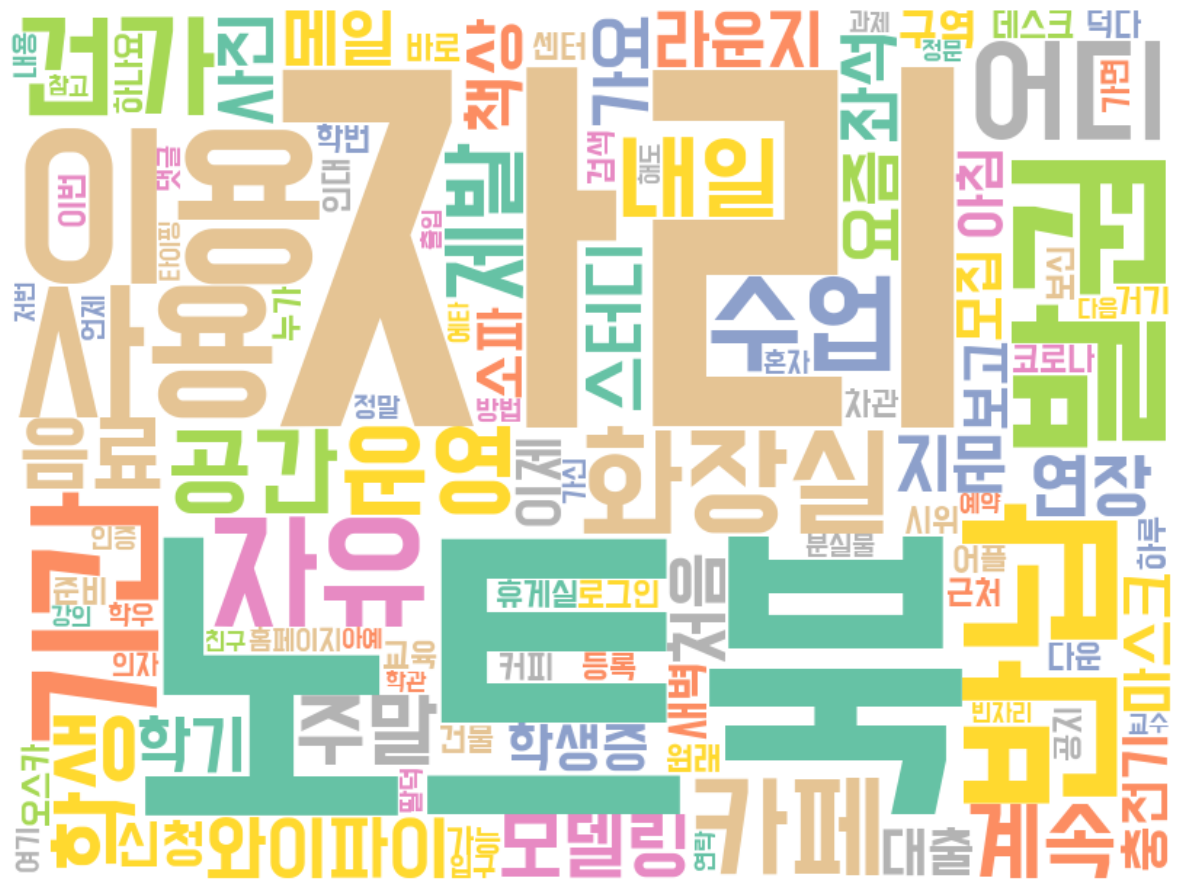

In [13]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path="../resources/fonts/BMDOHYEON_ttf.ttf",  # 글씨체 설정
    colormap='Set2',  # 색상 맵 설정
    width=800,
    height=600,
    background_color="white"
)

wc = wordcloud.generate_from_frequencies(temp_dic)

# 워드 클라우드 시각화
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


자리, 노트북, 이용, 발권, 반납 등에 관한 논의가 활발하게 이루어짐을 확인할 수 있다. 